created by Claude
saving plot results as a pdf file

Absolutely! I'll modify the code to save the plot as a PDF file. Here's the updated version:Perfect! Now the code will automatically save your plot as a high-quality PDF file. Here are the key changes:

## New Features:

1. **Automatic PDF saving**: The plot is saved as PDF by default
2. **High quality**: 300 DPI resolution for publication-quality figures
3. **Auto-generated filename**: Creates PDF filename based on your data file name
4. **Custom filename option**: You can specify your own PDF filename if needed

## Usage Examples:

**Basic usage (saves PDF automatically):**
```python
data_dict = plot_voltage_sweep_data()
```
This will create: `data_IV_plot.pdf`

**Custom PDF filename:**
```python
data_dict = plot_voltage_sweep_data(pdf_filename="my_measurement_results.pdf")
```

**Don't save PDF (just display):**
```python
data_dict = plot_voltage_sweep_data(save_pdf=False)
```

## Output Files:

- **Main plot**: `data_IV_plot.pdf`
- **3D plot** (if enabled): `data_IVentu-Ventd-0Vsd_tr350_77K_3D_plot.pdf`

## PDF Features:

- **High resolution**: 300 DPI for crisp, publication-ready figures
- **Vector format**: PDF preserves quality at any zoom level
- **Tight bounding box**: No unnecessary white space around the plot
- **Embedded fonts**: Text will display correctly on any system

The PDF will be saved in the same directory as your script, and you'll see a confirmation message when it's saved successfully!

Data loaded successfully. Shape: (1000, 3)
Plot saved as: I-Vx-Vn_0x15Vp_0Vs_MUXon_50MHz0dBm_2509161552_plot.pdf
Number of V2 values: 10
V2 range: -0.380 V to -0.200 V
V1 range: -0.600 V to -0.204 V
Current range: 3.900000e-05 A to 8.981500e-02 A


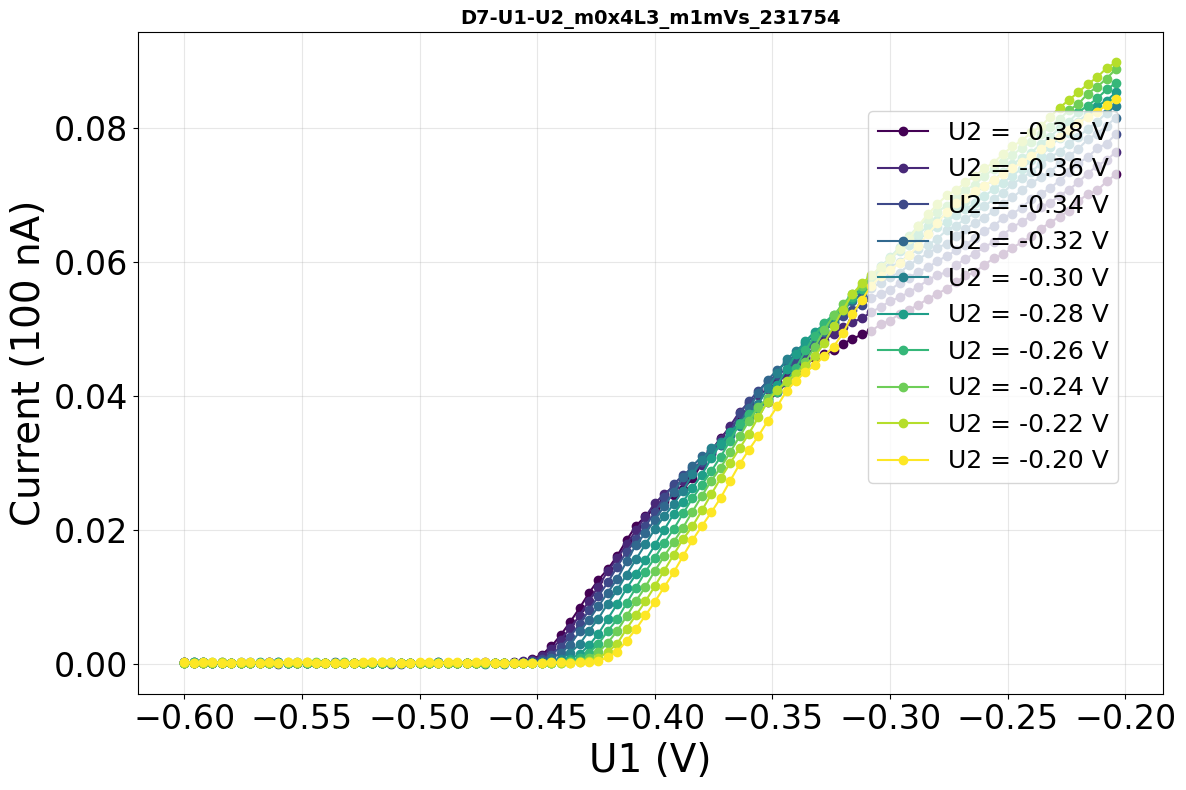

=== Data Analysis ===
Total data points: 1000
Unique V2 values: 10
V2 values: [-0.38 -0.36 -0.34 -0.32 -0.3  -0.28 -0.26 -0.24 -0.22 -0.2 ]
V1 range: -0.600 to -0.204 V
Current statistics:
  Mean: 2.813960e-02 A
  Std:  2.976118e-02 A
  Min:  3.900000e-05 A
  Max:  8.981500e-02 A

Plotting complete! PDF file has been saved.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_voltage_sweep_data(filename='I-Vx-Vn_0x15Vp_0Vs_MUXon_50MHz0dBm_2509161552.txt', save_pdf=True, pdf_filename=None):
    """
    Plot current vs V1 curves for various V2 values from the saved data file.
    
    Parameters:
    filename (str): Path to the data file
    save_pdf (bool): Whether to save the plot as PDF
    pdf_filename (str): Name of the PDF file (auto-generated if None)
    """
    
    # Read the data from file
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the file path.")
        return
    except Exception as e:
        print(f"Error reading file: {e}")
        return
    
    # Extract columns: V2, V1 (voltage), Current
    V2_values = data[:, 0]
    V1_values = data[:, 1]  
    currents = data[:, 2]
    
    # Group data by V2 values
    data_by_V2 = defaultdict(lambda: {'V1': [], 'current': []})
    
    for v2, v1, current in zip(V2_values, V1_values, currents):
        data_by_V2[v2]['V1'].append(v1)
        data_by_V2[v2]['current'].append(current)
    
    # Sort V2 keys for consistent plotting
    sorted_V2_keys = sorted(data_by_V2.keys())
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot each V2 curve
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_V2_keys)))
    
    for i, v2 in enumerate(sorted_V2_keys):
        V1_sorted = np.array(data_by_V2[v2]['V1'])
        current_sorted = np.array(data_by_V2[v2]['current'])
        
        # Sort by V1 to ensure proper line plotting
        sort_indices = np.argsort(V1_sorted)
        V1_sorted = V1_sorted[sort_indices]
        current_sorted = current_sorted[sort_indices]
        
        plt.plot(V1_sorted, current_sorted, '-o', 
                color=colors[i], 
                label=f'U2 = {v2:.2f} V',
                linewidth=1.5)


    
    # Formatting
    plt.xlabel('U1 (V)', fontsize=28)
    plt.ylabel('Current (100 nA)', fontsize=28)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.title('D7-U1-U2_m0x4L3_m1mVs_231754', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', fontsize=18)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Save as PDF if requested
    if save_pdf:
        if pdf_filename is None:
            # Auto-generate filename based on data filename
            base_name = filename.replace('.txt', '').replace('.dat', '')
            pdf_filename = f"{base_name}_plot.pdf"
        
        plt.savefig(pdf_filename, format='pdf', dpi=1200, bbox_inches='tight')
        print(f"Plot saved as: {pdf_filename}")
    
    # Show statistics
    print(f"Number of V2 values: {len(sorted_V2_keys)}")
    print(f"V2 range: {min(sorted_V2_keys):.3f} V to {max(sorted_V2_keys):.3f} V")
    print(f"V1 range: {min(V1_values):.3f} V to {max(V1_values):.3f} V")
    print(f"Current range: {min(currents):.6e} A to {max(currents):.6e} A")
    
    plt.show()
    
    return data_by_V2

def plot_3d_surface(filename='I-Vx-Vn_0x15Vp_0Vs_MUXon_50MHz0dBm_2509161552.txt', save_pdf=False):
    """
    Create a 3D surface plot of the data (optional visualization)
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for 3D plot")
        return
    
    from mpl_toolkits.mplot3d import Axes3D
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=20, alpha=0.6)
    
    ax.set_xlabel('V1 (V)')
    ax.set_ylabel('V2 (V)')
    ax.set_zlabel('Current (A)')
    ax.set_title('3D View: Current vs V1 and V2')
    
    plt.colorbar(scatter, shrink=0.5, aspect=20, label='Current (A)')
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_3D_plot.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1200, bbox_inches='tight')
        print(f"3D plot saved as: {pdf_filename}")
    
    plt.show()

def analyze_data_statistics(filename='I-Vx-Vn_0x15Vp_0Vs_MUXon_50MHz0dBm_2509161552.txt'):
    """
    Print detailed statistics about the measurement data
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for analysis")
        return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    print("=== Data Analysis ===")
    print(f"Total data points: {len(data)}")
    print(f"Unique V2 values: {len(np.unique(V2_values))}")
    print(f"V2 values: {np.unique(V2_values)}")
    print(f"V1 range: {np.min(V1_values):.3f} to {np.max(V1_values):.3f} V")
    print(f"Current statistics:")
    print(f"  Mean: {np.mean(currents):.6e} A")
    print(f"  Std:  {np.std(currents):.6e} A")
    print(f"  Min:  {np.min(currents):.6e} A")
    print(f"  Max:  {np.max(currents):.6e} A")

if __name__ == "__main__":
    # Main plotting function - saves PDF by default
    data_dict = plot_voltage_sweep_data(save_pdf=True)
    
    # Optional: Show statistics
    analyze_data_statistics()
    
    # Optional: Create 3D plot and save as PDF (uncomment if desired)
    # plot_3d_surface(save_pdf=True)
    
    print("\nPlotting complete! PDF file has been saved.")